In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.fft import fft, fftfreq
from ipywidgets import interact
from mpl_toolkits.mplot3d import Axes3D
def singSyllable(K,P):
    Fs = 22050  # sampling frequency
    t = np.arange(0, 0.24, 1/Fs) #time sample points
    
    #spring constant function
    
    #main diff equation
    def syrinx(y, t):
        b = 1000
        d = 10**8
        yprime = np.zeros(2)
        yprime[0] = y[1]
        yprime[1] = (P - b) * y[1] - K * y[0] - d * (y[0]**2) * y[1]
        return yprime
    
    #init condition
    y0 = [0.01, 0.01]
    
    #ode solver
    z = odeint(syrinx, y0, t)
    song = z[:, 0]
    
    return t, song

def fft_max(K,P):
    Fs = 22050
    t, song = singSyllable(K,P)
    t_fft = fftfreq(len(t), 1/Fs)[0:len(t)//2]
    s_fft = fft(song)
    sng = 2.0/len(t) * np.abs(s_fft[0:len(t)//2])
    return t_fft[np.argmax(sng)],np.max(sng)

def plot_wave_and_fft():
    for K in range(5):
        for P in range(5):
            t, song = singSyllable(10**8+10**7*K,-1000+40*P)
    
            #plt.figure(figsize=(12, 6))
            fig,(ax1,ax2,ax3) = plt.subplots(nrows=3)
            # Plot wave
            #plt.subplot(3, 1, 1)
            ax1.plot(t, song)
            ax1.set_title('Waveform')
            ax1.set_xlabel('Time')
            ax1.set_ylabel('Amplitude')
            
            # Calculate FFT
            Fs = 22050
            s_fft = fft(song)
            t_fft = fftfreq(len(t), 1/Fs)[0:len(t)//2]
            
            # Plot FFT
            #plt.subplot(3, 1, 2)
            ax2.plot(t_fft, 2.0/len(t) * np.abs(s_fft[0:len(t)//2]))
            ax2.set_title('FFT')
            ax2.set_xlabel('Frequency (Hz)')
            ax2.set_ylabel('Amplitude')
            
            
            
            # Plot FFT
            #plt.subplot(3, 1, 2)
            ax3.specgram(song,Fs=Fs,Fc=0)
            ax3.set_title('sonogram')
            ax3.set_ylabel('Frequency (Hz)')
            ax3.set_xlabel('time')
            ax3.set_ylim(0, 6000)
            plt.tight_layout()
            plt.show()

In [ ]:
K = np.arange(10**8, 10**9, 10**7)
P = np.arange(-1000, 50000, 250)
k,p = np.meshgrid(K,P)
#Freq, Amp = fft_max(k,p)
Freq=[]
Amp = []
 
for p1 in P:
    tempF = []
    tempA = []
    for k1 in K:
        p ,q = fft_max(k1,p1)
        tempF.append(p)
        tempA.append(q)  
    Freq.append(tempF)
    Amp.append(tempA)
 
 # Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot points with colors
sc = ax.scatter(p, k, Freq, c=Amp, cmap='viridis')

# Add color bar
cbar = plt.colorbar(sc)
cbar.set_label('Z2 (Color)')

# Set labels
ax.set_xlabel('XP')
ax.set_ylabel('K')
ax.set_zlabel('Freq')

plt.show()

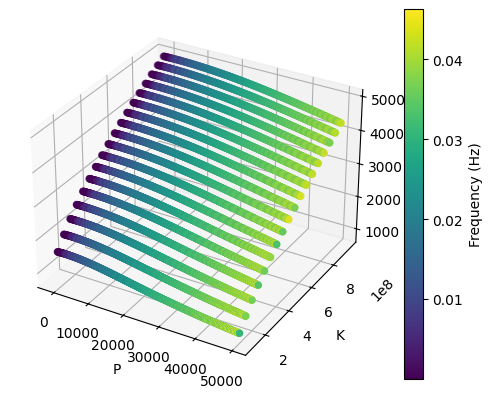

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.fft import fft, fftfreq
from mpl_toolkits.mplot3d import Axes3D

def singSyllable(K,P):
    Fs = 22050  # sampling frequency
    t = np.arange(0, 0.24, 1/Fs) #time sample points
    
    # spring constant function
    
    # main diff equation
    def syrinx(y, t):
        b = 1000
        d = 10**8
        yprime = np.zeros(2)
        yprime[0] = y[1]
        yprime[1] = (P - b) * y[1] - K * y[0] - d * (y[0]**2) * y[1]
        return yprime
    
    # init condition
    y0 = [0.01, 0.01]
    
    # ode solver
    z = odeint(syrinx, y0, t)
    song = z[:, 0]
    
    return t, song

def fft_max(K,P):
    Fs = 22050
    t, song = singSyllable(K,P)
    t_fft = fftfreq(len(t), 1/Fs)[0:len(t)//2]
    s_fft = fft(song)
    sng = 2.0/len(t) * np.abs(s_fft[0:len(t)//2])
    return t_fft[np.argmax(sng)], np.max(sng)

# Define parameter ranges
K = np.arange(10**8, 10**9, 5*10**7)
P = np.arange(-1000, 50000, 100)

# Compute frequencies and amplitudes
Freq = np.zeros((len(P), len(K)))
Amp = np.zeros((len(P), len(K)))
for i, p in enumerate(P):
    for j, k in enumerate(K):
        freq, amp = fft_max(k, p)
        Freq[i, j] = freq
        Amp[i, j] = amp

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot points
K_mesh, P_mesh = np.meshgrid(K, P)
sc = ax.scatter(P_mesh, K_mesh, Freq, c=Amp, cmap='viridis')

# Add color bar
cbar = plt.colorbar(sc)
cbar.set_label('Frequency (Hz)')

# Set labels
ax.set_xlabel('P')
ax.set_ylabel('K')
ax.set_zlabel('Frequency (Hz)')

plt.show()


In [2]:
from tempfile import TemporaryFile
freq = TemporaryFile()
amp = TemporaryFile()

np.save(freq, Freq)

np.save(amp, Amp)